In [ ]:
#  Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Membaca file CSV
df = pd.read_csv('data_knn.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
#Melihat jumlah kolom dan baris pada data
df.shape

(569, 33)

In [ ]:
#Melihat statistik deskriptif dari data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#Melakukan pengecekan terhadap data yang kosong
print(df.columns[df.isna().any()].tolist())
print(df.isna().sum())

['Unnamed: 32']
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst

In [ ]:
# Hapus kolom 'id' karena tidak relevan untuk klasifikasi
df.drop(columns=['id'], inplace=True)

In [ ]:
# Melihat jenis data di setiap kolom
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
# Ubah kategori "diagnosis" menjadi numerik
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Menghapus kolom terakhir yang mengandung nilai NaN di setiap baris
df = df.iloc[:, :-1]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Menormalisasi dengan menggunakan MinMax Normalization
scaler = MinMaxScaler()
df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:].to_numpy())
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


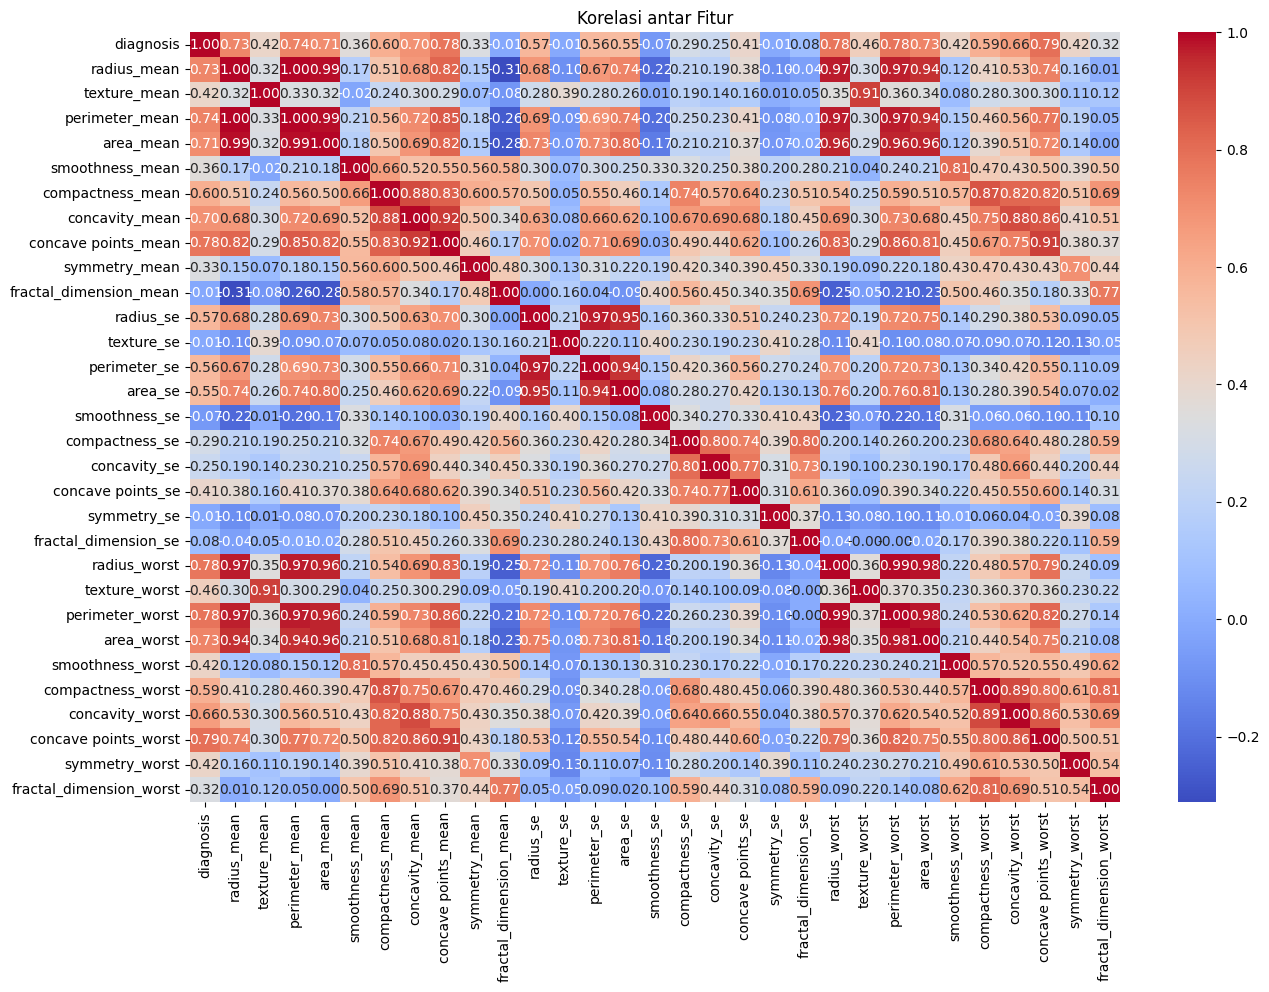

In [ ]:
# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Fitur')
plt.show()

In [ ]:
# Melihat jumlah outliers di setiap kolom
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filt = ((df < (lower_bound)) | (df > (upper_bound)))
filt.sum()

diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

In [ ]:
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave points', 'symmetry', 'fractal_dimension']
sub_features = ['_mean', '_se', '_worst']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/

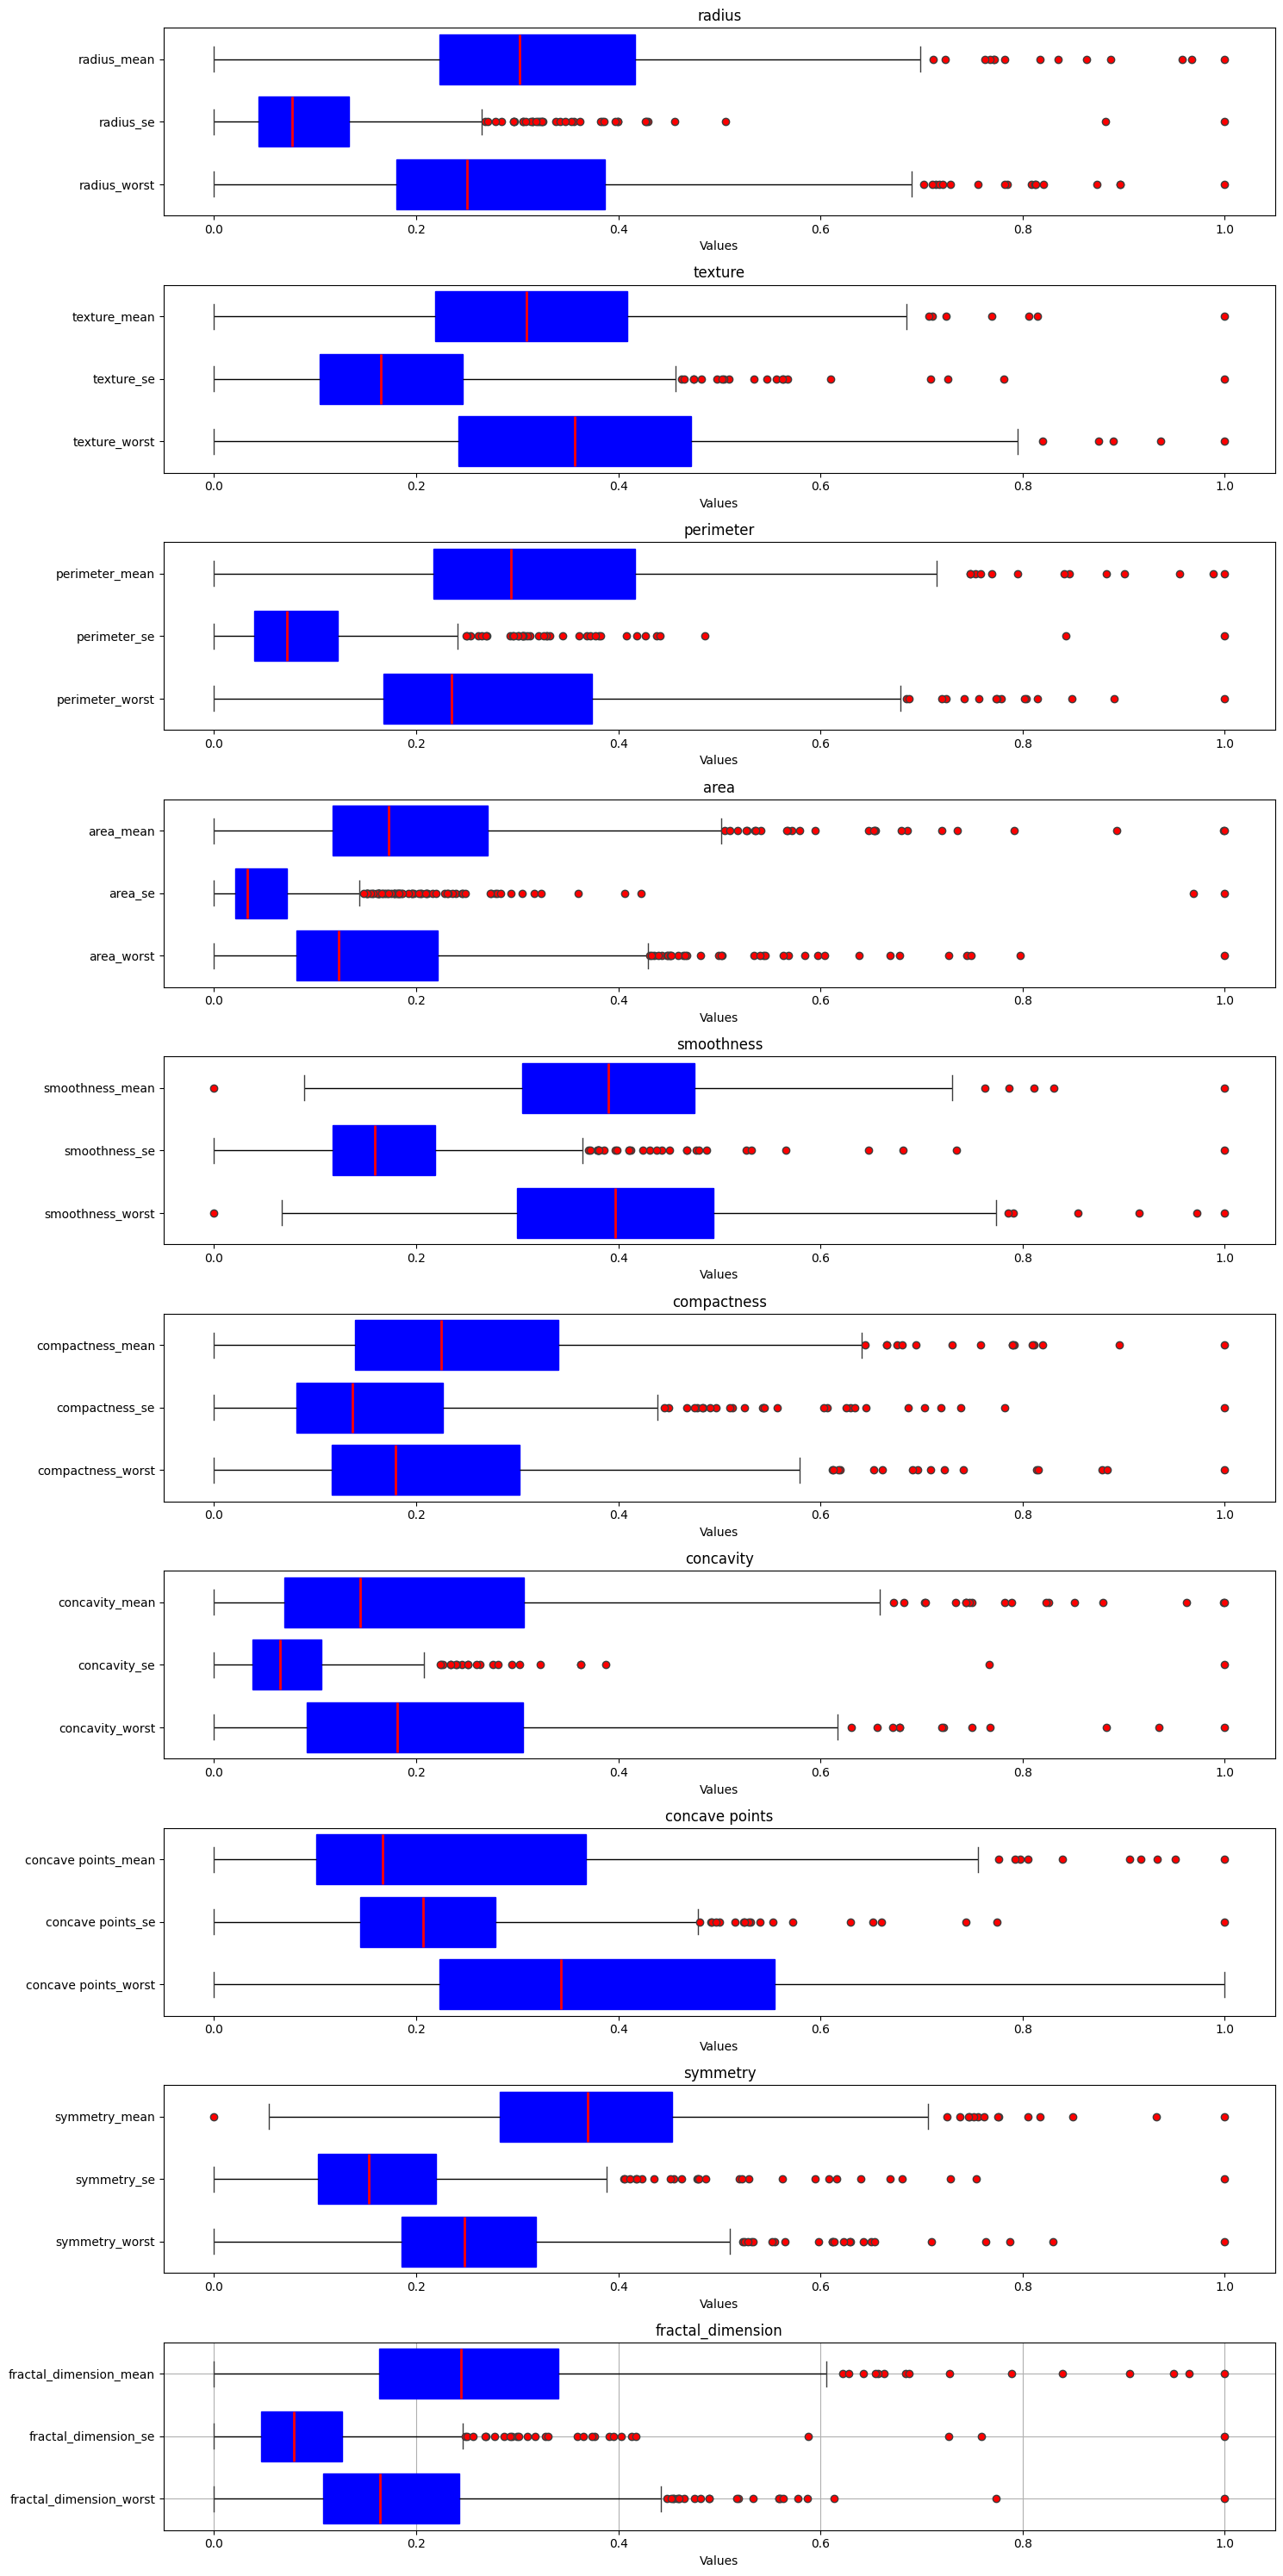

In [ ]:
# Membuat boxplot
plt.figure(figsize=(15, 30))
boxprops = dict(color='blue')
whiskerprops = dict(color='black')
medianprops = dict(color='red', linewidth=2)
plt.subplots_adjust(hspace=0.5)
l = 1
for i in features:
    plt.subplot(10, 1, l)
    sns.boxplot(data=[df[i+j] for j in sub_features], orient='h', flierprops=dict(marker='o', markersize=6, markerfacecolor='red'), boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)
    plt.xlabel('Values')
    plt.title(i)
    l = l + 1
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-15-6047d01e1da0>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df.loc[df['diagnosis'] == 1][i+j].values,
<ipython-input-15-6047d01e1da0>:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df.loc[df['diagnosis'] == 0][i+j].values,


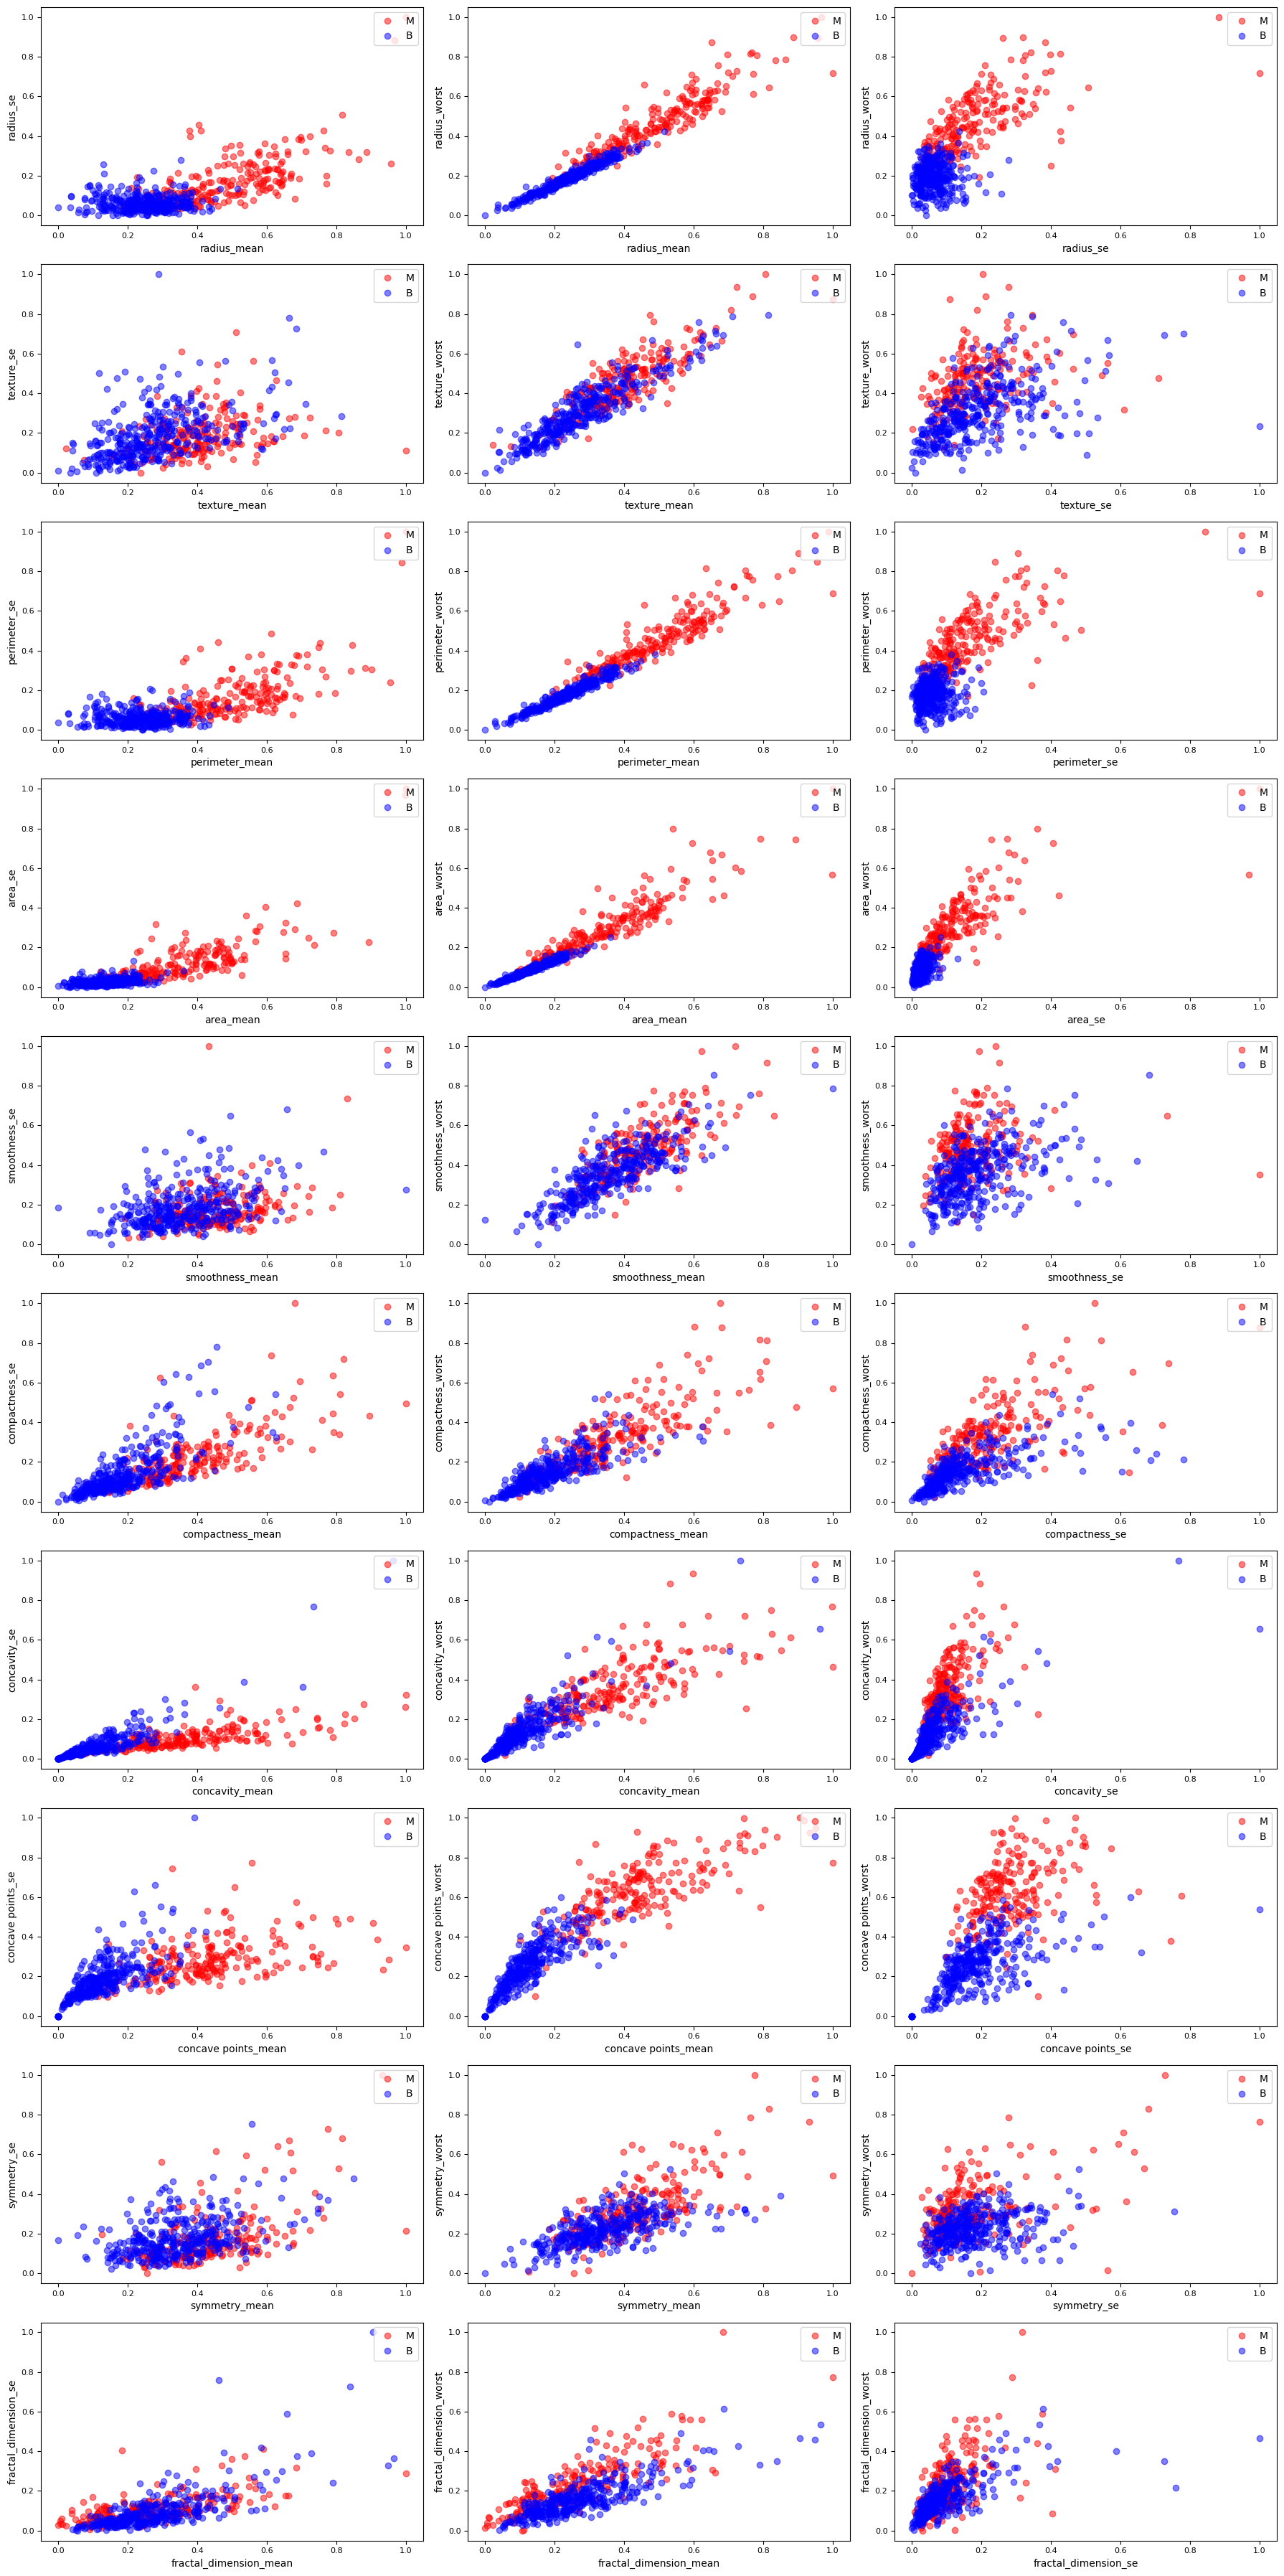

In [ ]:
# Membuat scatter plot semua atribut
plt.figure(figsize=(18, 36))
l = 1
for i in features:
    for j in sub_features:
        for k in sub_features[sub_features.index(j):]:
            if j != k:
                plt.subplot(10, 3, l)

                plt.plot(df.loc[df['diagnosis'] == 1][i+j].values,
                         df.loc[df['diagnosis'] == 1][i+k].values, "ro", label = "M", alpha=0.5, marker='o', linestyle='None')

                plt.plot(df.loc[df['diagnosis'] == 0][i+j].values,
                         df.loc[df['diagnosis'] == 0][i+k].values, "bo", label = "B", alpha=0.5, marker='o', linestyle='None')

                plt.legend(loc='upper right')
                plt.xlabel(i+j)
                plt.ylabel(i+k)
                plt.xticks(fontsize=8)
                plt.yticks(fontsize=8)
                plt.grid(False)
                l = l + 1
plt.tight_layout()
plt.show()


In [ ]:
# Mendefinisikan fitur dan target
X = df[['concave points_mean', 'concave points_worst']]
Y = df['diagnosis']

In [ ]:
# Membagi data kedalam data training dan data test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Algoritma k-NN**

In [ ]:
#Parameter KNN
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weights = ['distance', 'uniform']
p = [1, 2, 3]

In [ ]:
#Modelling KNN
best_accuracy = 0
best_confusion_matrix = None

for i in K:
    for j in weights:
        for k in p:

            KNN = KNeighborsClassifier(n_neighbors=i, weights=j, p=k)
            KNN.fit(X_train, Y_train)
            Y_pred = KNN.predict(X_test)
            akurasi = KNN.score(X_test, Y_test)

            if akurasi > best_accuracy:
                best_accuracy = akurasi
                best_K = i
                best_weight = j
                best_p = k
                best_Y_pred = Y_pred
                best_confusion_matrix = confusion_matrix(Y_test, best_Y_pred)

report = classification_report(Y_test, best_Y_pred)
print("Best Model:")
print('K = %d, Weight = %s, p = %d \n' % (best_K,best_weight,best_p))
print("Akurasi: ", best_accuracy, '\n')
print(report)
print("Confusion Matrix:")
print(best_confusion_matrix)

Best Model:
K = 7, Weight = distance, p = 2 

Akurasi:  0.9385964912280702 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
[[69  2]
 [ 5 38]]


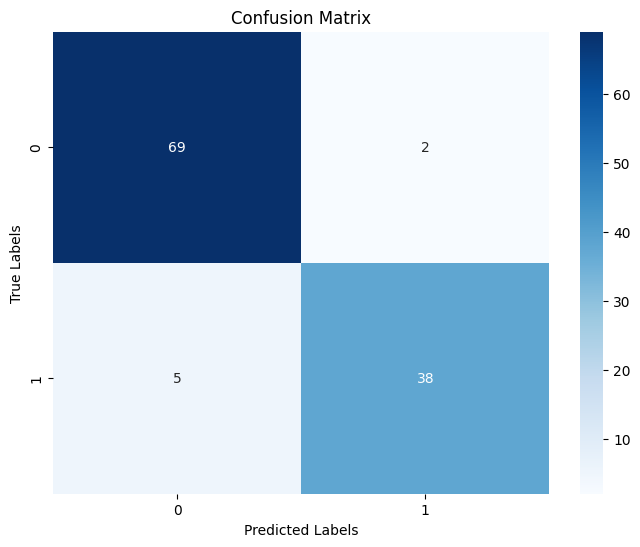

In [ ]:
# Menampilkan gambar confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(best_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

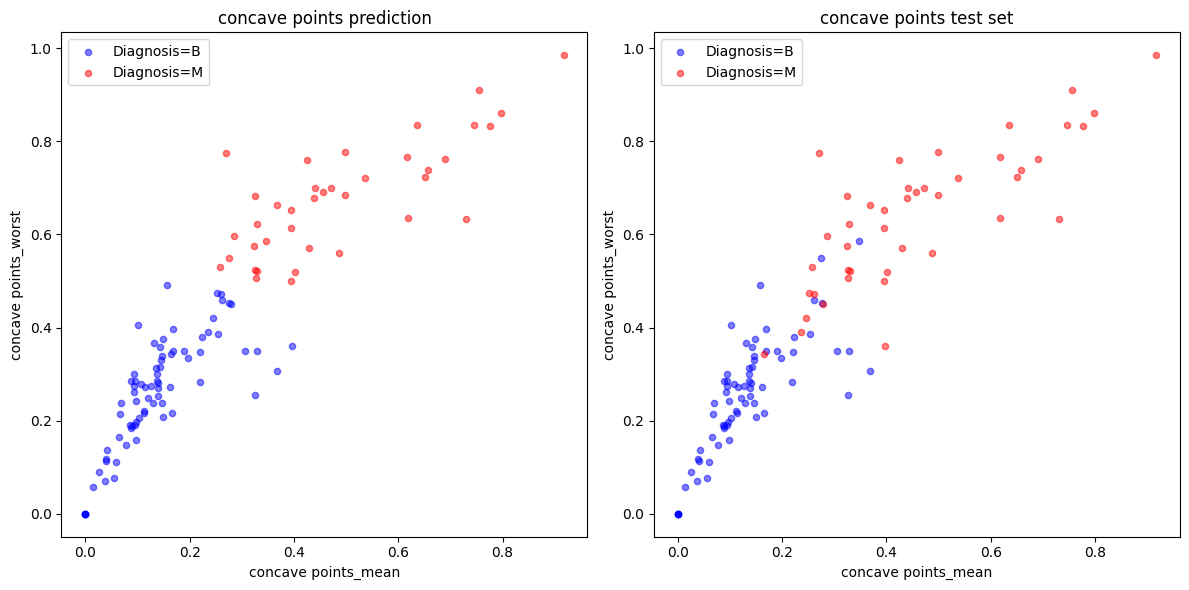

In [ ]:
# Membuat DataFrame untuk hasil prediksi dan data tes
var = 'concave points'
X_temp = df[[f'{var}_mean', f'{var}_worst']]
X_test_temp = (X_test) * (X_temp.max() - X_temp.min()) + X_temp.min()
X_test_temp = X_test_temp.to_numpy()
X_test_temp = pd.DataFrame(X_test_temp, columns=[f'{var}_mean', f'{var}_worst'])

Y_test_temp = Y_test.to_numpy()
Y_test_temp = pd.DataFrame(Y_test_temp, columns=['diagnosis'])

Y_pred_temp = pd.DataFrame(Y_pred, columns=['diagnosis'])

# Membuat scatter plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
diagnosis_mapping = {0: 'B', 1: 'M'}

# Scatter plot untuk hasil prediksi
for i, z_value in enumerate(set(Y_pred_temp['diagnosis'])):
    indices = [j for j, z in enumerate(Y_pred_temp['diagnosis']) if z == z_value]
    axs[0].scatter(X_test_temp.loc[indices, f'{var}_mean'], X_test_temp.loc[indices, f'{var}_worst'], label=f'Diagnosis={diagnosis_mapping[z_value]}', s=20, alpha=0.5, color='red' if z_value == 1 else 'blue')

axs[0].set_title(f'{var} prediction')
axs[0].set_xlabel(f'{var}_mean')
axs[0].set_ylabel(f'{var}_worst')
axs[0].legend()

# Scatter plot untuk data tes
for i, z_value in enumerate(set(Y_test_temp['diagnosis'])):
    indices = [j for j, z in enumerate(Y_test_temp['diagnosis']) if z == z_value]
    axs[1].scatter(X_test_temp.loc[indices, f'{var}_mean'], X_test_temp.loc[indices, f'{var}_worst'], label=f'Diagnosis={diagnosis_mapping[z_value]}', s=20, alpha=0.5, color='red' if z_value == 1 else 'blue')

axs[1].set_title(f'{var} test set')
axs[1].set_xlabel(f'{var}_mean')
axs[1].set_ylabel(f'{var}_worst')
axs[1].legend()

plt.tight_layout()
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


**Khusus Concave Points**

In [ ]:
np.random.seed(42)
# Mendefinisikan fitur dan target
X = df[['concave points_mean', 'concave points_worst']]
Y = df['diagnosis']
# Membagi data kedalam data training dan data test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
n_est = [10,50,100,150,200,250,300,500]
acc_train_rf = []
acc_test_rf = []
acc = 0
for n in n_est:
  clf = RandomForestClassifier(n_estimators = n)
  clf.fit(X_train, Y_train)
  acc_test_temp = clf.score(X_test,Y_test)
  acc_train_rf.append(clf.score(X_train,Y_train))
  acc_test_rf.append(acc_test_temp)
  if acc_test_temp > acc:
    acc = acc_test_temp
    n_est_best = n
    Y_pred = clf.predict(X_test)

print('The best number of estimators for attribute of concave points is '+str(n_est_best)+' with accuracy of '+str(acc))
print(report)

The best number of estimators for attribute of concave points is 150 with accuracy of 0.9210526315789473
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



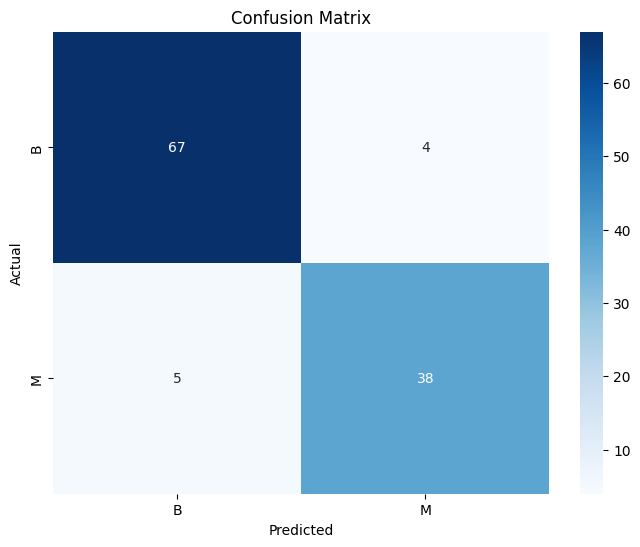

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Membuat DataFrame dari confusion matrix
cm_df = pd.DataFrame(cm, index=['B', 'M'], columns=['B', 'M'])

# Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm_df, annot=True, fmt="g", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

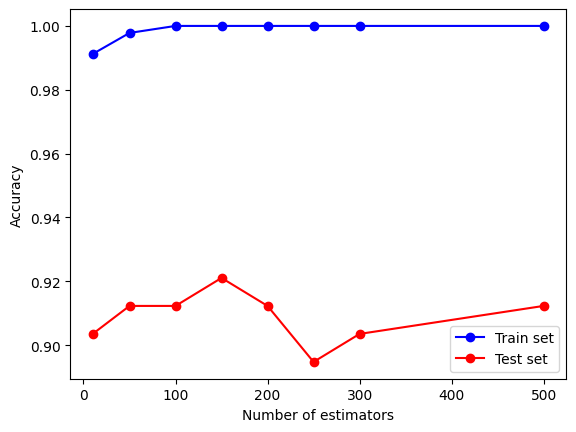

In [ ]:
plt.plot(n_est, acc_train_rf, 'o-', color='blue')
plt.plot(n_est, acc_test_rf, 'o-', color='red')
plt.legend(['Train set', 'Test set'])
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

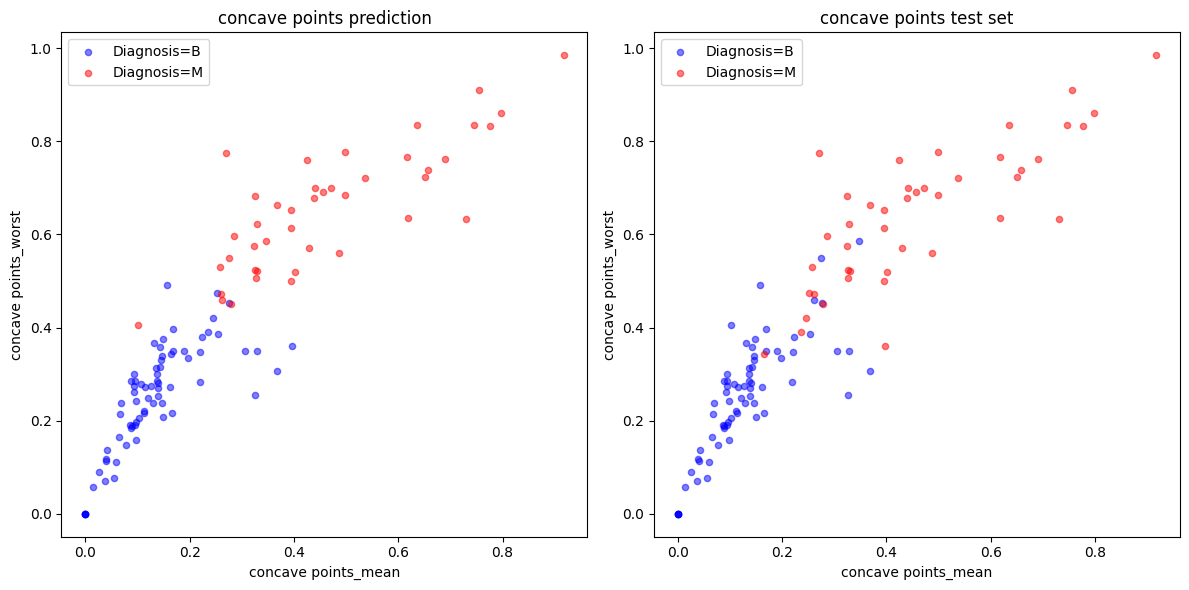

In [ ]:
# Membuat DataFrame untuk hasil prediksi dan data tes
var = 'concave points'
X_temp = df[[f'{var}_mean', f'{var}_worst']]
X_test_temp = (X_test) * (X_temp.max() - X_temp.min()) + X_temp.min()
X_test_temp = X_test_temp.to_numpy()
X_test_temp = pd.DataFrame(X_test_temp, columns=[f'{var}_mean', f'{var}_worst'])

Y_test_temp = Y_test.to_numpy()
Y_test_temp = pd.DataFrame(Y_test_temp, columns=['diagnosis'])

Y_pred_temp = pd.DataFrame(Y_pred, columns=['diagnosis'])

# Membuat scatter plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
diagnosis_mapping = {0: 'B', 1: 'M'}

# Scatter plot untuk hasil prediksi
for i, z_value in enumerate(set(Y_pred_temp['diagnosis'])):
    indices = [j for j, z in enumerate(Y_pred_temp['diagnosis']) if z == z_value]
    axs[0].scatter(X_test_temp.loc[indices, f'{var}_mean'], X_test_temp.loc[indices, f'{var}_worst'], label=f'Diagnosis={diagnosis_mapping[z_value]}', s=20, alpha=0.5, color='red' if z_value == 1 else 'blue')

axs[0].set_title(f'{var} prediction')
axs[0].set_xlabel(f'{var}_mean')
axs[0].set_ylabel(f'{var}_worst')
axs[0].legend()

# Scatter plot untuk data tes
for i, z_value in enumerate(set(Y_test_temp['diagnosis'])):
    indices = [j for j, z in enumerate(Y_test_temp['diagnosis']) if z == z_value]
    axs[1].scatter(X_test_temp.loc[indices, f'{var}_mean'], X_test_temp.loc[indices, f'{var}_worst'], label=f'Diagnosis={diagnosis_mapping[z_value]}', s=20, alpha=0.5, color='red' if z_value == 1 else 'blue')

axs[1].set_title(f'{var} test set')
axs[1].set_xlabel(f'{var}_mean')
axs[1].set_ylabel(f'{var}_worst')
axs[1].legend()

plt.tight_layout()
plt.show()